In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency, randint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [451]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\train.csv")
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\test.csv")

In [452]:
df = pd.DataFrame(df)
testdf = pd.DataFrame(testdf)

In [453]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [454]:
df = df.drop(columns=["PassengerId"])

In [455]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [456]:
df.Survived.value_counts(normalize=True)
#We know now that the data is mildly imbalanced. 

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [457]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [458]:
df.Age = df.Age.fillna(df.Age.median())

In [459]:
df.Cabin = df.Cabin.fillna(df.Cabin.mode()[0])

In [460]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [461]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

<Axes: xlabel='Pclass', ylabel='Survived'>

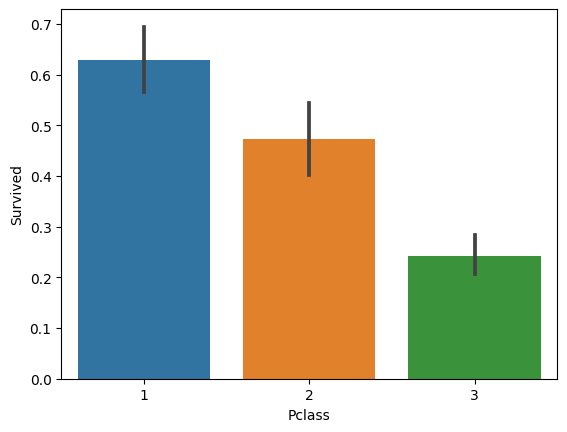

In [462]:
sns.barplot(x = df.Pclass, y= df.Survived)

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

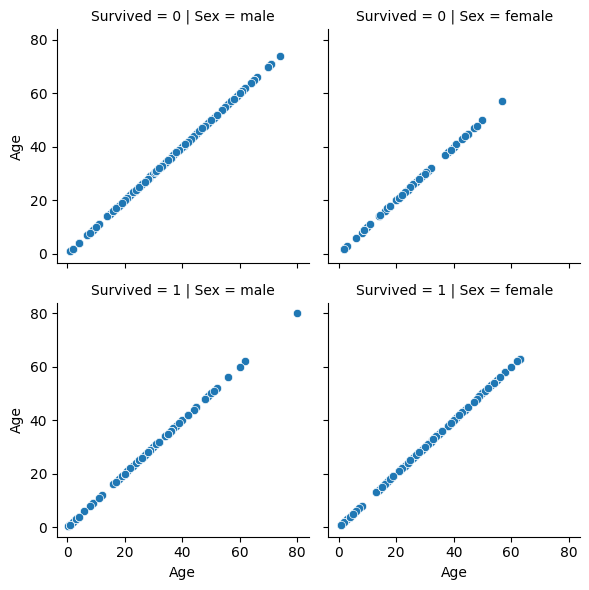

In [463]:
g= sns.FacetGrid(df, col= "Sex", row= "Survived")
g.map(sns.scatterplot, "Age", "Age")
#here we can see that oldest woman on deck was at most 63-ish, and they survived. Age is not an indicator when it comes to women.

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='Fare'>

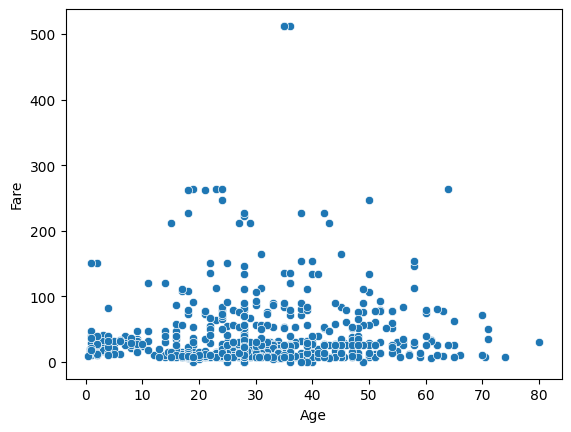

In [464]:
sns.scatterplot(df, x = "Age", y= "Fare")
#There is no correlation between Age and the money paid for the ticket.

In [465]:
bins = [0, 2, 8, 15, 23, 35, 48, 65, 80]

In [466]:
labels = ["baby", "young child", "older child", "teenager", "young adult", "adult", "older adult", "elderly"]

In [467]:
df["AgeCategory"] = pd.cut(x= df["Age"], bins=bins, labels=labels)

In [468]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,teenager
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,young adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,young adult
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenager
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,young adult
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adult


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Fare', ylabel='Pclass'>

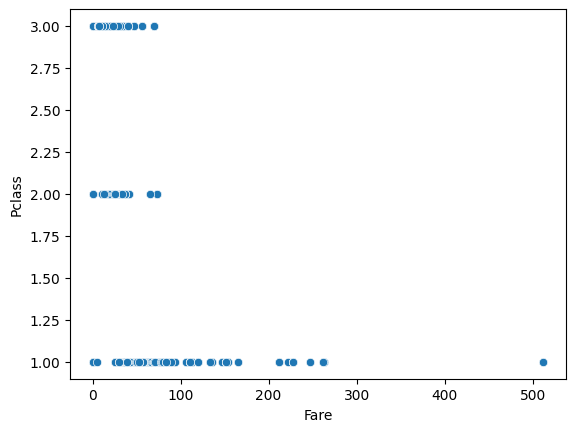

In [469]:
sns.scatterplot(df, x= "Fare", y="Pclass")
#While the fare for 3rd and 2nd class can only go up to 100$, 1st class fares can go upto 500$+.

In [470]:
df = df.drop("Age", axis=1)

In [471]:
df

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,B96 B98,S,teenager
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,adult
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,B96 B98,S,young adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,young adult
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,B96 B98,S,young adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,B96 B98,S,young adult
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,teenager
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,B96 B98,S,young adult
889,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,young adult


In [472]:
df["family"] = df["SibSp"] + df["Parch"]
df = df.drop(columns=["Parch", "SibSp"])
df

,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,AgeCategory,family
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,B96 B98,S,teenager,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C85,C,adult,1
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,B96 B98,S,young adult,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,C123,S,young adult,1
4,0,3,"Allen, Mr. William Henry",male,373450,8.0500,B96 B98,S,young adult,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,211536,13.0000,B96 B98,S,young adult,0
887,1,1,"Graham, Miss. Margaret Edith",female,112053,30.0000,B42,S,teenager,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,23.4500,B96 B98,S,young adult,3
889,1,1,"Behr, Mr. Karl Howell",male,111369,30.0000,C148,C,young adult,0


In [473]:
df["Title"] =  df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
df = df.drop(columns=["Name"])

In [474]:
categoric = []
numeric = []
for i in df.columns:
    if df[i].dtypes == "int64" or df[i].dtypes == "float64":
        numeric.append(df[i])
    if df[i].dtypes == "object" or df[i].dtypes == "category":
        categoric.append(df[i])
    

In [475]:
categoric = pd.DataFrame(categoric).T
categoric

,Sex,Ticket,Cabin,Embarked,AgeCategory,Title
0,male,A/5 21171,B96 B98,S,teenager,Mr
1,female,PC 17599,C85,C,adult,Mrs
2,female,STON/O2. 3101282,B96 B98,S,young adult,Miss
3,female,113803,C123,S,young adult,Mrs
4,male,373450,B96 B98,S,young adult,Mr
...,...,...,...,...,...,...
886,male,211536,B96 B98,S,young adult,Rev
887,female,112053,B42,S,teenager,Miss
888,female,W./C. 6607,B96 B98,S,young adult,Miss
889,male,111369,C148,C,young adult,Mr


In [476]:
numeric = pd.DataFrame(numeric).T
numeric

,Survived,Pclass,Fare,family
0,0.0,3.0,7.2500,1.0
1,1.0,1.0,71.2833,1.0
2,1.0,3.0,7.9250,0.0
3,1.0,1.0,53.1000,1.0
4,0.0,3.0,8.0500,0.0
...,...,...,...,...
886,0.0,2.0,13.0000,0.0
887,1.0,1.0,30.0000,0.0
888,0.0,3.0,23.4500,3.0
889,1.0,1.0,30.0000,0.0


In [477]:
corr_matr = numeric.corr()

<Axes: >

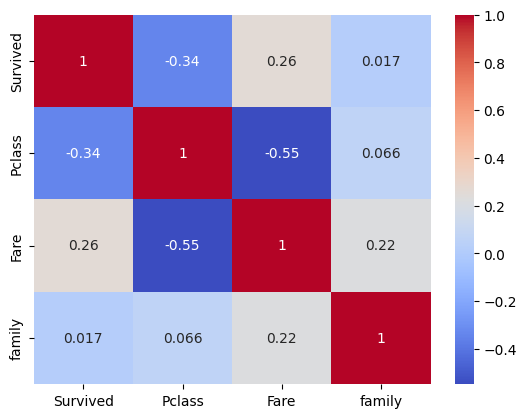

In [478]:
sns.heatmap(corr_matr, annot=True, cmap="coolwarm")

In [479]:
for col in corr_matr.columns: 
    for index in corr_matr.index: #here we look at each index of each column of corr_matr
        if col != "Survived" and index != "Survived":
            corr_value = corr_matr.loc[index,col] #and here by using .loc we can easily access the values of those index-column pairs
            if col != index: #we wrote this code because we dont want to delete the "1" of each index=column pairs and we dont want to delete a column-index pair if they have high correlation with label
                if corr_value < -0.70 or corr_value > 0.70:
                    if col in numeric.columns and index in numeric.columns:
                        if numeric[col].std() < numeric[index].std():
                            numeric.drop(col, axis=1, inplace=True)
                        else:
                            numeric.drop(index, axis=1, inplace=True)

In [480]:
numeric

,Survived,Pclass,Fare,family
0,0.0,3.0,7.2500,1.0
1,1.0,1.0,71.2833,1.0
2,1.0,3.0,7.9250,0.0
3,1.0,1.0,53.1000,1.0
4,0.0,3.0,8.0500,0.0
...,...,...,...,...
886,0.0,2.0,13.0000,0.0
887,1.0,1.0,30.0000,0.0
888,0.0,3.0,23.4500,3.0
889,1.0,1.0,30.0000,0.0


In [481]:
lstofsignificant = []
for i in categoric.columns:
    if i != "Survived":
        contingency_table = pd.crosstab(categoric[i], numeric["Survived"])
        stat, p, dof, expected = chi2_contingency(contingency_table)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Not significant')
        else:
            print('Significant')
            lstofsignificant.append(categoric[i])

lstofsignificant = pd.DataFrame(lstofsignificant).T
lstofsignificant

stat=260.717, p=0.000
Significant
stat=766.570, p=0.012
Significant
stat=232.754, p=0.000
Significant
stat=25.964, p=0.000
Significant
stat=24.276, p=0.001
Significant
stat=300.023, p=0.000
Significant


,Sex,Ticket,Cabin,Embarked,AgeCategory,Title
0,male,A/5 21171,B96 B98,S,teenager,Mr
1,female,PC 17599,C85,C,adult,Mrs
2,female,STON/O2. 3101282,B96 B98,S,young adult,Miss
3,female,113803,C123,S,young adult,Mrs
4,male,373450,B96 B98,S,young adult,Mr
...,...,...,...,...,...,...
886,male,211536,B96 B98,S,young adult,Rev
887,female,112053,B42,S,teenager,Miss
888,female,W./C. 6607,B96 B98,S,young adult,Miss
889,male,111369,C148,C,young adult,Mr


In [482]:
finaldf = pd.concat([numeric, lstofsignificant], axis=1)

In [483]:
finaldf

,Survived,Pclass,Fare,family,Sex,Ticket,Cabin,Embarked,AgeCategory,Title
0,0.0,3.0,7.2500,1.0,male,A/5 21171,B96 B98,S,teenager,Mr
1,1.0,1.0,71.2833,1.0,female,PC 17599,C85,C,adult,Mrs
2,1.0,3.0,7.9250,0.0,female,STON/O2. 3101282,B96 B98,S,young adult,Miss
3,1.0,1.0,53.1000,1.0,female,113803,C123,S,young adult,Mrs
4,0.0,3.0,8.0500,0.0,male,373450,B96 B98,S,young adult,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,13.0000,0.0,male,211536,B96 B98,S,young adult,Rev
887,1.0,1.0,30.0000,0.0,female,112053,B42,S,teenager,Miss
888,0.0,3.0,23.4500,3.0,female,W./C. 6607,B96 B98,S,young adult,Miss
889,1.0,1.0,30.0000,0.0,male,111369,C148,C,young adult,Mr


In [484]:
finaldf["Ticket"] = finaldf.Ticket.apply(lambda x: x.split(" ")[0].strip() if len(x) > 6 else "1")

In [485]:
finaldf

,Survived,Pclass,Fare,family,Sex,Ticket,Cabin,Embarked,AgeCategory,Title
0,0.0,3.0,7.2500,1.0,male,A/5,B96 B98,S,teenager,Mr
1,1.0,1.0,71.2833,1.0,female,PC,C85,C,adult,Mrs
2,1.0,3.0,7.9250,0.0,female,STON/O2.,B96 B98,S,young adult,Miss
3,1.0,1.0,53.1000,1.0,female,1,C123,S,young adult,Mrs
4,0.0,3.0,8.0500,0.0,male,1,B96 B98,S,young adult,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,13.0000,0.0,male,1,B96 B98,S,young adult,Rev
887,1.0,1.0,30.0000,0.0,female,1,B42,S,teenager,Miss
888,0.0,3.0,23.4500,3.0,female,W./C.,B96 B98,S,young adult,Miss
889,1.0,1.0,30.0000,0.0,male,1,C148,C,young adult,Mr


In [486]:
finaldf.groupby("Sex")["Survived"].value_counts()
#You are more likely to survive if you are female. Even tho there are less females their survival rate is higher.

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64

In [487]:
finaldf.groupby("family")["Survived"].value_counts()
#You are more likely to survive if you are alone in the ship, makes sense since you dont need to think about others

family  Survived
0.0     0.0         374
        1.0         163
1.0     1.0          89
        0.0          72
2.0     1.0          59
        0.0          43
3.0     1.0          21
        0.0           8
4.0     0.0          12
        1.0           3
5.0     0.0          19
        1.0           3
6.0     0.0           8
        1.0           4
7.0     0.0           6
10.0    0.0           7
Name: count, dtype: int64

In [488]:
finaldf.groupby("Title")["Survived"].value_counts().to_frame()

count
Title        Survived       
Capt         0.0           1
Col          0.0           1
             1.0           1
Don          0.0           1
Dr           0.0           4
             1.0           3
Jonkheer     0.0           1
Lady         1.0           1
Major        1.0           1
             0.0           1
Master       1.0          23
             0.0          17
Miss         1.0         127
             0.0          55
Mlle         1.0           2
Mme          1.0           1
Mr           0.0         436
             1.0          81
Mrs          1.0          99
             0.0          26
Ms           1.0           1
Rev          0.0           6
Sir          1.0           1
the Countess 1.0           1

In [489]:
finaldf

,Survived,Pclass,Fare,family,Sex,Ticket,Cabin,Embarked,AgeCategory,Title
0,0.0,3.0,7.2500,1.0,male,A/5,B96 B98,S,teenager,Mr
1,1.0,1.0,71.2833,1.0,female,PC,C85,C,adult,Mrs
2,1.0,3.0,7.9250,0.0,female,STON/O2.,B96 B98,S,young adult,Miss
3,1.0,1.0,53.1000,1.0,female,1,C123,S,young adult,Mrs
4,0.0,3.0,8.0500,0.0,male,1,B96 B98,S,young adult,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,13.0000,0.0,male,1,B96 B98,S,young adult,Rev
887,1.0,1.0,30.0000,0.0,female,1,B42,S,teenager,Miss
888,0.0,3.0,23.4500,3.0,female,W./C.,B96 B98,S,young adult,Miss
889,1.0,1.0,30.0000,0.0,male,1,C148,C,young adult,Mr


In [490]:
columns_to_encode = ["Title", "Embarked"]
onehot = OneHotEncoder(handle_unknown="ignore")
fitteddata = onehot.fit(finaldf[columns_to_encode])
transformeddata = onehot.transform(finaldf[columns_to_encode])
transformeddf = pd.DataFrame(transformeddata.toarray() , columns=onehot.get_feature_names_out(columns_to_encode))

In [491]:
finaldf = finaldf.drop(columns=["Embarked", "Title"], axis=1)
finaldf = pd.concat([finaldf, transformeddf],axis=1)

In [492]:
finaldf

,Survived,Pclass,Fare,family,Sex,Ticket,Cabin,AgeCategory,Title_Capt,Title_Col,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,7.2500,1.0,male,A/5,B96 B98,teenager,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,71.2833,1.0,female,PC,C85,adult,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,7.9250,0.0,female,STON/O2.,B96 B98,young adult,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,53.1000,1.0,female,1,C123,young adult,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,8.0500,0.0,male,1,B96 B98,young adult,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,13.0000,0.0,male,1,B96 B98,young adult,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1.0,1.0,30.0000,0.0,female,1,B42,teenager,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,3.0,23.4500,3.0,female,W./C.,B96 B98,young adult,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1.0,1.0,30.0000,0.0,male,1,C148,young adult,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [493]:
finaldf = finaldf.sort_index(axis=1)

In [494]:
columns_to_label = ["Sex", "Cabin", "AgeCategory", "Ticket"]
label = LabelEncoder()
for i in columns_to_label:
    label.fit(finaldf[i])
    finaldf[i] = label.transform(finaldf[i])

In [495]:
finaldf

,AgeCategory,Cabin,Embarked_C,Embarked_Q,Embarked_S,Fare,Pclass,Sex,Survived,Ticket,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,family
0,5,47,0.0,0.0,1.0,7.2500,3.0,1,0.0,15,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,81,1.0,0.0,0.0,71.2833,1.0,0,1.0,28,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,6,47,0.0,0.0,1.0,7.9250,3.0,0,1.0,47,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,55,0.0,0.0,1.0,53.1000,1.0,0,1.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6,47,0.0,0.0,1.0,8.0500,3.0,1,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,6,47,0.0,0.0,1.0,13.0000,2.0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
887,5,30,0.0,0.0,1.0,30.0000,1.0,0,1.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,6,47,0.0,0.0,1.0,23.4500,3.0,0,0.0,49,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
889,6,60,1.0,0.0,0.0,30.0000,1.0,1,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [496]:
X = finaldf.drop("Survived", axis=1)

In [497]:
y= finaldf.Survived

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

In [499]:
rand = RandomForestClassifier()

In [500]:
params = {
    "n_estimators": np.arange(50, 500, 50),
    "max_depth": [10,20,None],
    "min_samples_split": [2, 4, 6]

}

In [501]:
grid1 = GridSearchCV(rand, params)
grid1.fit(X_train, y_train)

bestofrand = grid1.best_estimator_
bestofrand

RandomForestClassifier(min_samples_split=6, n_estimators=200)

In [502]:
rand = RandomForestClassifier(n_estimators=250, min_samples_split=6, random_state=42)

rand.fit(X_train, y_train)

y_pred = rand.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy, "cm:", cm, "f1:", f1)

Accuracy: 0.7937219730941704 cm: [[118  19]
 [ 27  59]] f1: 0.7195121951219512


In [503]:
logclass = LogisticRegression(random_state=42)
logclass.fit(X_train, y_train)
y_pred = logclass.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy, "cm:", cm, "f1:", f1)

Accuracy: 0.8161434977578476 cm: [[118  19]
 [ 22  64]] f1: 0.7573964497041421


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [504]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy, "cm:", cm, "f1:", f1)

Accuracy: 0.757847533632287 cm: [[120  17]
 [ 37  49]] f1: 0.6447368421052633


In [505]:
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\test.csv")

In [506]:
testdf = pd.DataFrame(testdf)

In [507]:
testdf["family"] = testdf.SibSp + testdf.Parch
testdf = testdf.drop(columns=["SibSp","Parch"])

In [508]:
testdf["Title"] = testdf.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
testdf = testdf.drop(columns=["Name"])

In [509]:
testdf = testdf.drop(columns=["PassengerId"])

In [510]:
testdf

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,family,Title
0,3,male,34.5,330911,7.8292,NaN,Q,0,Mr
1,3,female,47.0,363272,7.0000,NaN,S,1,Mrs
2,2,male,62.0,240276,9.6875,NaN,Q,0,Mr
3,3,male,27.0,315154,8.6625,NaN,S,0,Mr
4,3,female,22.0,3101298,12.2875,NaN,S,2,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,A.5. 3236,8.0500,NaN,S,0,Mr
414,1,female,39.0,PC 17758,108.9000,C105,C,0,Dona
415,3,male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr
416,3,male,NaN,359309,8.0500,NaN,S,0,Mr


In [511]:
testdf["AgeCategory"] = pd.cut(x= testdf["Age"], bins=bins, labels=labels)

In [512]:
testdf.isnull().sum()

Pclass           0
Sex              0
Age             86
Ticket           0
Fare             1
Cabin          327
Embarked         0
family           0
Title            0
AgeCategory     86
dtype: int64

In [513]:
testdf.Age = testdf.Age.fillna(np.mean(testdf.Age))
testdf.isnull().sum()

Pclass           0
Sex              0
Age              0
Ticket           0
Fare             1
Cabin          327
Embarked         0
family           0
Title            0
AgeCategory     86
dtype: int64

In [514]:
testdf.Fare = testdf.Fare.fillna(testdf.Fare.median())
testdf.isnull().sum()

Pclass           0
Sex              0
Age              0
Ticket           0
Fare             0
Cabin          327
Embarked         0
family           0
Title            0
AgeCategory     86
dtype: int64

In [515]:
testdf.Cabin = testdf.Cabin.fillna(testdf.Cabin.mode()[0])
testdf.isnull().sum()

Pclass          0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin           0
Embarked        0
family          0
Title           0
AgeCategory    86
dtype: int64

In [516]:
testdf["Ticket"] = testdf.Ticket.apply(lambda x: x.split(" ")[0].strip() if len(x) > 6 else "1")

In [517]:
testdf = testdf.drop("Age", axis=1)

In [518]:
testdf

,Pclass,Sex,Ticket,Fare,Cabin,Embarked,family,Title,AgeCategory
0,3,male,1,7.8292,B57 B59 B63 B66,Q,0,Mr,young adult
1,3,female,1,7.0000,B57 B59 B63 B66,S,1,Mrs,adult
2,2,male,1,9.6875,B57 B59 B63 B66,Q,0,Mr,older adult
3,3,male,1,8.6625,B57 B59 B63 B66,S,0,Mr,young adult
4,3,female,3101298,12.2875,B57 B59 B63 B66,S,2,Mrs,teenager
...,...,...,...,...,...,...,...,...,...
413,3,male,A.5.,8.0500,B57 B59 B63 B66,S,0,Mr,NaN
414,1,female,PC,108.9000,C105,C,0,Dona,adult
415,3,male,SOTON/O.Q.,7.2500,B57 B59 B63 B66,S,0,Mr,adult
416,3,male,1,8.0500,B57 B59 B63 B66,S,0,Mr,NaN


In [519]:
for i in columns_to_label:
    label.fit(testdf[i])
    testdf[i] = label.transform(testdf[i])

In [520]:
encoded_data = onehot.transform(testdf[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=onehot.get_feature_names_out(columns_to_encode))

testdf = pd.concat([testdf, encoded_df], axis=1)
testdf = testdf.drop(columns=["Embarked", "Title"])

In [521]:
testdf

,Pclass,Sex,Ticket,Fare,Cabin,family,AgeCategory,Title_Capt,Title_Col,Title_Don,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.8292,15,0,6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,0,0,7.0000,15,1,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,0,9.6875,15,0,3,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1,0,8.6625,15,0,6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,0,4,12.2875,15,2,5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,7,8.0500,15,0,8,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,1,0,20,108.9000,22,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,3,1,31,7.2500,15,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,3,1,0,8.0500,15,0,8,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [522]:
testdf = testdf.sort_index(axis=1)

In [523]:
testdf.columns==X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [527]:
y_pred_testdf = logclass.predict(testdf)
y_pred = pd.DataFrame(y_pred_testdf, columns=["Survived"])
y_pred

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0


In [528]:
submission = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\gender_submission.csv")
submission = submission.drop(columns=["Survived"])
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [529]:
finalsub = pd.concat([submission, y_pred],axis=1)
finalsub

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [530]:
finalsub.to_csv("TitanicSubmission20")